# Egyszerű ABC kódolók / basic alphabet ciphers

In [ ]:
# Run this cell first
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import HTML, display

Most examples and images are based on: https://www.tutorialspoint.com/cryptography_with_python/index.htm

## ABC kezelése python nyelven / Alphabet management in python

In [ ]:
ord('A')

In [ ]:
ord('a')

In [ ]:
chr(65)

In [ ]:
out = "<table>"
i = 0
for row in range(0,16):
    out += "<tr>"
    for col in range(0,16):
        out += "<td>"+str(i)+"</td><td><b>"+chr(i)+"</b></td>"
        i+=1
    out += "</tr>"
out += "</table>"
display(HTML(out))

## Caesar kódolás (ABC helyettesítés) / Caesar's cipher (alphabet substiution)
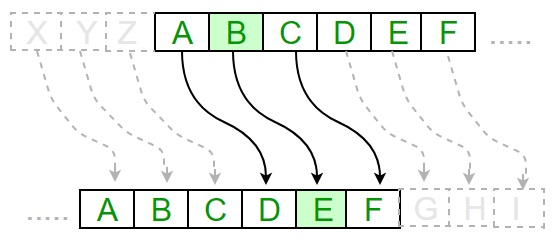

In [ ]:
@interact(key=(-13,13))
def caesar(text = "plaintext", key = 13):
    """Caesar kódoló implementáció / Implementation of Caesar's cipher
    Bemenet / input:
      * text: kódolandó vagy dekódolandó szöveg / text to encrypt or decrypt
      * key: eltolás értéke / shift value
    """
    result = ""
    # végighaladunk a szövegen / we progress trough the source text
    for i in range(len(text)):
        char = text[i]
        # nagybetűs karakterek kódolása / encoding of uppercase letters     
        if (char.isupper()):
            result += chr((ord(char) + key - 65) % 26 + 65)
        # kisbetűs karakterek kódolása / encoding of lowercase letters
        else:
            result += chr((ord(char) + key - 97) % 26 + 97)
    return result

In [ ]:
%%script csharp
// Caesar cipher in C# script

static char cipher(char ch, int key) {  
    if (!char.IsLetter(ch)) {  
        return ch;  
    }  
    char d = char.IsUpper(ch) ? 'A' : 'a';  
    return (char)((((ch + key) - d) % 26) + d);  
}  
  
static string caesar(string input, int key) {  
    string output = string.Empty;  

    foreach(char ch in input)  
    output += cipher(ch, key);  
    
    return output;  
}  

Console.WriteLine(caesar("plaintext", 13));

# Tranzpozíciós kódolás (permutáció) / Transposition cipher (permutation)
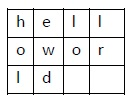

In [ ]:
@interact(key=(1,20))
def transposition(text="helloworld", key=4):
    """Tranzpozíciós kódoló implementáció / Implementation of transposition cipher
    Bemenet / input:
      * text: kódolandó szöveg / text to encrypt
      * key: oszlopok száma / number of columns
    """
    # sorokat tartalmazó karakter tömbök / arrays containing rows
    ciphertext = [''] * key

    # minden oszlopra / for each column
    for col in range(key):
        position = col
        # oszlop kitöltése a forrás szöveg karaktereivel / filling column with source characters
        while position < len(text):
            ciphertext[col] += text[position]
            position += key
    # eredmény: karakter tömbök összefűzése soronként / result: merging character arrays by rows
    return ''.join(ciphertext)

## Bináris adatok kezelése python nyelven / Handling of binary data in python

In [ ]:
text = 'special characters: árvíztűrő tükörfúrógép'
display(text)

In [ ]:
data = bytes(text, 'utf-8')
display(data)

In [ ]:
import base64
b64 = base64.encodebytes(data)
display(b64)

## Bináris XOR (kizáró VAGY) kódolás / binary XOR (eXclusive OR) encoding

Igazság táblázat / truth table:

| a | b | a XOR b |
|:-:|:-:|:-:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

data XOR key = encoded

encoded XOR key = data


In [ ]:
key = 0b0101010
data = 0b0111000
encoded = key ^ data
display(bin(encoded))
display(bin(encoded ^ key))

In [ ]:
@interact
def xor_encrypt_string(data='plaintext', key='awesomepassword'):
    from itertools import cycle
    import base64

    xored = ''.join(chr(ord(x) ^ ord(y)) for (x, y) in zip(data, cycle(key)))

    return base64.encodebytes(xored.encode()).strip()


In [ ]:
@interact
def xor_decrypt_string(data='ERsEGgEZAAgV', key='awesomepassword'):
    from itertools import cycle
    import base64

    data = base64.decodebytes(data.encode())
    xored = ''.join(chr(x ^ ord(y)) for (x, y) in zip(data, cycle(key)))
    return xored


## Gyakorló feladatok / practice tasks

Implementálja az alábbiakat / implement the following:

* https://www.dcode.fr/vigenere-cipher
* https://www.dcode.fr/mexican-army-cipher-wheel
* https://www.dcode.fr/rail-fence-cipher
* https://www.dcode.fr/base-36-cipher